## Dataset generation from deformable mirror and GRIN fiber

In [66]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber
from mmfsim.datasets import SimulatedStepIndexSpeckleOutputDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
grid = Grid(pixel_size=0.25e-6, pixel_numbers=(256,256))
fiber = StepIndexFiber(radius=26e-6, wavelength=2064e-9, n1=1.465, n2=1.445)
print(fiber)

StepIndexFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.445
  - Wavelength: 2064.0 nm
  - Numerical aperture: 0.241
  - Number of guided LP modes: 50
  - Number of guided LP modes (counting degenerates): 94
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46471555  0.          0.          1.        ]
 [ 1.46427798  2.          1.          1.        ]
 [ 1.4637032   4.          2.          1.        ]
 [ 1.4635022   1.          0.          2.        ]
 [ 1.46299886  6.          3.          1.        ]
 [ 1.46258186  3.          1.          2.        ]
 [ 1.46216966  8.          4.          1.        ]
 [ 1.46152086  5.          2.          2.        ]
 [ 1.46132381  2.          0.          3.        ]
 [ 1.46121882 10.          5.          1.        ]]


In [53]:
fiber.compute_modes_fields(grid)

In [54]:
fiber.stored_modes_fields

True

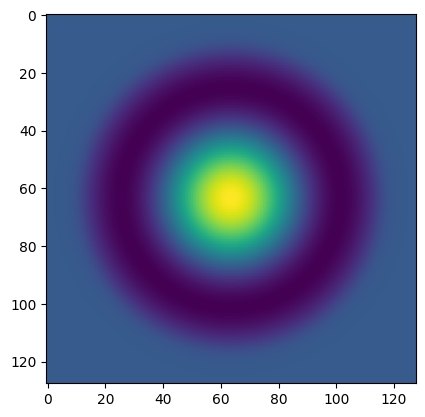

In [55]:
plt.imshow(fiber._modes[:,:,0,3])

In [62]:
dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, length=100, N_modes=fiber._N_modes_degen, degen=True, noise_std=0/100)
dset.compute_from_transfer_matrix(phases_dim=(6,6))

# dset.compute(phases_dim=(6,6))

Computed TM row 1/36
Computed TM row 2/36
Computed TM row 3/36
Computed TM row 4/36
Computed TM row 5/36
Computed TM row 6/36
Computed TM row 7/36
Computed TM row 8/36
Computed TM row 9/36
Computed TM row 10/36
Computed TM row 11/36
Computed TM row 12/36
Computed TM row 13/36
Computed TM row 14/36
Computed TM row 15/36
Computed TM row 16/36
Computed TM row 17/36
Computed TM row 18/36
Computed TM row 19/36
Computed TM row 20/36
Computed TM row 21/36
Computed TM row 22/36
Computed TM row 23/36
Computed TM row 24/36
Computed TM row 25/36
Computed TM row 26/36
Computed TM row 27/36
Computed TM row 28/36
Computed TM row 29/36
Computed TM row 30/36
Computed TM row 31/36
Computed TM row 32/36
Computed TM row 33/36
Computed TM row 34/36
Computed TM row 35/36
Computed TM row 36/36
Computed couple 1/100
Computed couple 2/100
Computed couple 3/100
Computed couple 4/100
Computed couple 5/100
Computed couple 6/100
Computed couple 7/100
Computed couple 8/100
Computed couple 9/100
Computed couple 10/

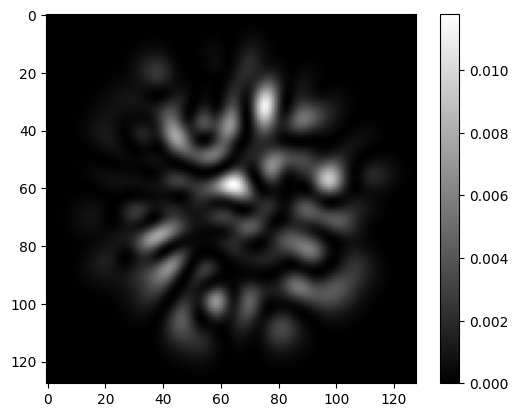

In [65]:
plt.imshow(dset.intensities[..., 7], cmap='gray')
plt.colorbar()

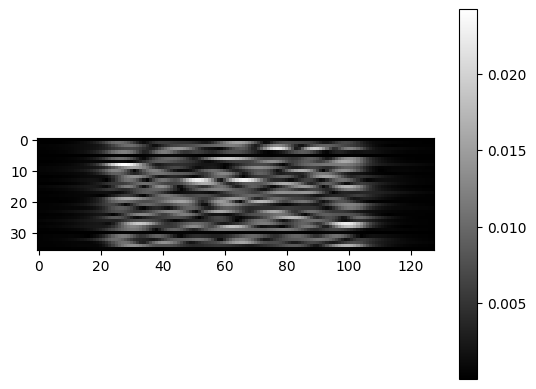

In [58]:
plt.imshow(np.abs(dset._transfer_matrix[...,32]), cmap='gray')
plt.colorbar()

In [11]:
dset.compute_fourier_transforms(pad=1)

Computed Fourier 1/11000
Computed Fourier 2/11000
Computed Fourier 3/11000
Computed Fourier 4/11000
Computed Fourier 5/11000
Computed Fourier 6/11000
Computed Fourier 7/11000
Computed Fourier 8/11000
Computed Fourier 9/11000
Computed Fourier 10/11000
Computed Fourier 11/11000
Computed Fourier 12/11000
Computed Fourier 13/11000
Computed Fourier 14/11000
Computed Fourier 15/11000
Computed Fourier 16/11000
Computed Fourier 17/11000
Computed Fourier 18/11000
Computed Fourier 19/11000
Computed Fourier 20/11000
Computed Fourier 21/11000
Computed Fourier 22/11000
Computed Fourier 23/11000
Computed Fourier 24/11000
Computed Fourier 25/11000
Computed Fourier 26/11000
Computed Fourier 27/11000
Computed Fourier 28/11000
Computed Fourier 29/11000
Computed Fourier 30/11000
Computed Fourier 31/11000
Computed Fourier 32/11000
Computed Fourier 33/11000
Computed Fourier 34/11000
Computed Fourier 35/11000
Computed Fourier 36/11000
Computed Fourier 37/11000
Computed Fourier 38/11000
Computed Fourier 39/1

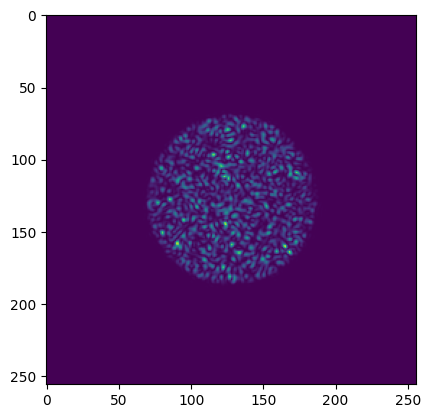

In [12]:
plt.imshow(np.square(np.abs(dset._transf[...,2])))

In [15]:
# dset.export(return_output_fields=True, add_exp_noise=False, noise_func=np.max, file_type='matlab')
dset.export(return_output_fields=True, add_exp_noise=True, noise_func=np.max, file_type='numpy')

OverflowError: serializing a bytes object larger than 4 GiB requires pickle protocol 4 or higher